In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import os
import re
import string

import pandas as pd
import numpy as np

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



In [ ]:
main_data=pd.read_csv("train.csv")
data=main_data.copy()
data.drop(columns=['id'],axis=1,inplace=True)
data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
21597,0,i'm so today my small #cousin got his first ...
21598,0,"for #rohingya, fear and forced marriages #traf..."
21599,0,birds &amp; bad #piggies #finger family \ #n...
21600,0,"now that #bfestbuzz is winding down, get for..."


,count
label,
0,20109
1,1493


0s : 1s  ::   13.47 : 1


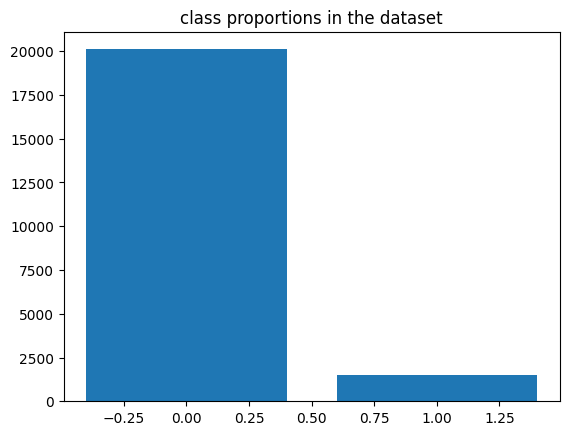

In [ ]:
#Check class distribution in dependent variable
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

#### we see that we have an unbalanced data mojority class to minority class ratio of 13 : 1

,count
label,
0,20109
1,4479


0s : 1s  ::   4.49 : 1


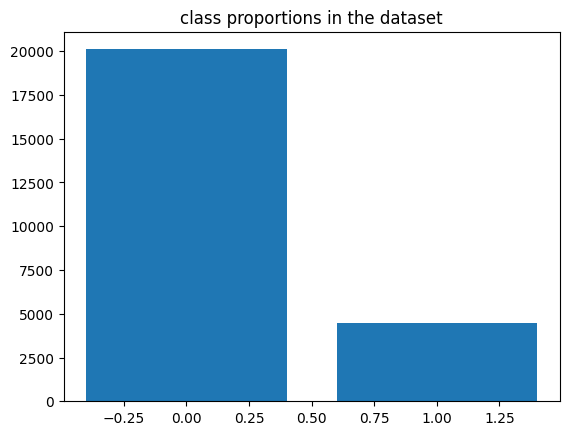

In [ ]:
#Balancing the dataset using Oversampling
data1=data[data['label']==1]
data0=data[data['label']==0]
data=pd.concat([data,data1,data1], axis=0)
data

#Check class distribution in dependent variable again
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)


def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [ ]:
#preprocess train dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x:len(str(x).split()))

train_data,test_data= train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

In [ ]:
#classes proportion in dependent variable in train and test dataset
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')

print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

===========Train Data =========
label
0    16084
1     3586
Name: count, dtype: int64
19670
===========Test Data =========
label
0    4025
1     893
Name: count, dtype: int64
4918


In [ ]:
#train and validation dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:15736
Class distributionCounter({0: 12867, 1: 2869})
Valid data len:3934
Class distributionCounter({0: 3217, 1: 717})


In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
maxlen = 50
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), padding='post', maxlen=maxlen)
x_valid = pad_sequences(tokenizer.texts_to_sequences(X_valid), padding='post', maxlen=maxlen)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['tweet'].tolist()), padding='post', maxlen=maxlen)

# Convert labels to NumPy arrays
train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())

# Print data lengths and class distributions
print('Train data len:' + str(len(x_train)))
print('Class distribution' + str(Counter(train_labels)))

print('Validation data len:' + str(len(x_valid)))
print('Class distribution' + str(Counter(valid_labels)))

print('Test data len:' + str(len(x_test)))
print('Class distribution' + str(Counter(test_labels)))

# TensorFlow dataset preparation
train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

Train data len:15736
Class distributionCounter({0: 12867, 1: 2869})
Validation data len:3934
Class distributionCounter({0: 3217, 1: 717})
Test data len:4918
Class distributionCounter({0: 4025, 1: 893})


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[  24   76 9577 4510  643  411   35 4511    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[   13 12115  9510     5     2   214  1496     1 11248     1     1     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Test dataset ====
tf.Tensor(
[2669 2099    6  374 1896   94  855   23   26    5  101   26  277  901
  104    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
#model preparation
max_features =50000
embedding_dim =16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))




model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800016    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 50, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
16/16 [==============================] - 9s 280ms/step - loss: 3.4714 - binary_accuracy: 0.7836 - val_loss: 2.1404 - val_binary_accuracy: 0.8177
Epoch 2/10
16/16 [==============================] - 6s 360ms/step - loss: 1.6122 - binary_accuracy: 0.8177 - val_loss: 1.0966 - val_binary_accuracy: 0.8177
Epoch 3/10
16/16 [==============================] - 4s 259ms/step - loss: 0.9417 - binary_accuracy: 0.8177 - val_loss: 0.7532 - val_binary_accuracy: 0.8177
Epoch 4/10
16/16 [==============================] - 5s 288ms/step - loss: 0.7168 - binary_accuracy: 0.8176 - val_loss: 0.6206 - val_binary_accuracy: 0.8177
Epoch 5/10
16/16 [==============================] - 5s 278ms/step - loss: 0.6023 - binary_accuracy: 0.8262 - val_loss: 0.5229 - val_binary_accuracy: 0.8693
Epoch 6/10
16/16 [==============================] - 4s 239ms/step - loss: 0.5105 - binary_accuracy: 0.8705 - val_loss: 0.4473 - val_binary_accuracy: 0.9301
Epoch 7/10
16/16 [==============================] - 6s 360ms/ste

In [ ]:
#make predictions on validation dataset
valid_predict= model.predict(x_valid)
print(valid_predict[:10])

123/123 [==============================] - 2s 13ms/step
[[1.1329269e-02]
 [5.2325422e-04]
 [1.6293438e-04]
 [4.2004944e-03]
 [5.9071215e-05]
 [5.0880224e-03]
 [1.2934400e-04]
 [5.6152587e-04]
 [2.1014991e-03]
 [1.8921880e-04]]


In [ ]:
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['tweet'].tolist()), padding='post', maxlen=maxlen)

# Generate predictions for all samples
predictions = model.predict(x_test)

154/154 [==============================] - 3s 18ms/step


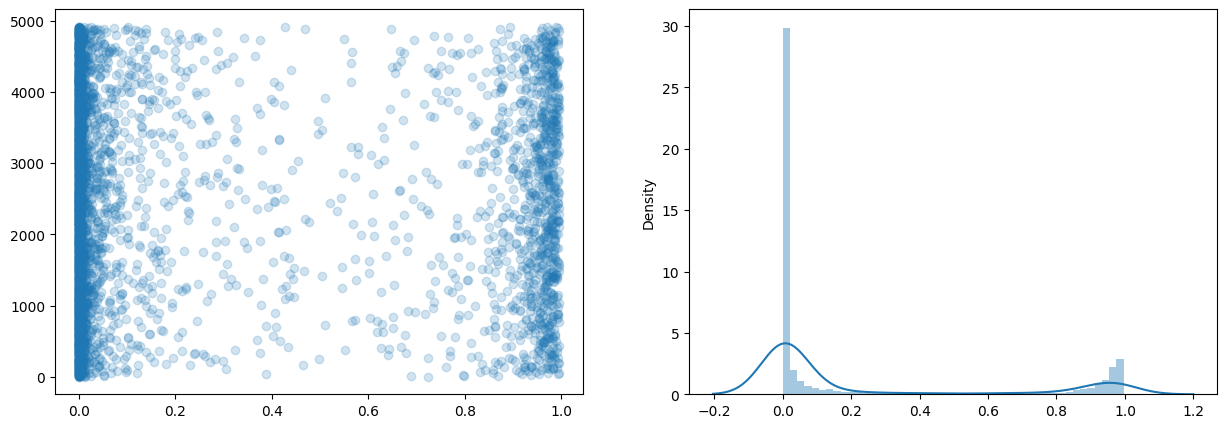

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,range(0,len(predictions)),alpha=0.2)
ax2=sns.distplot(predictions)

#### A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied

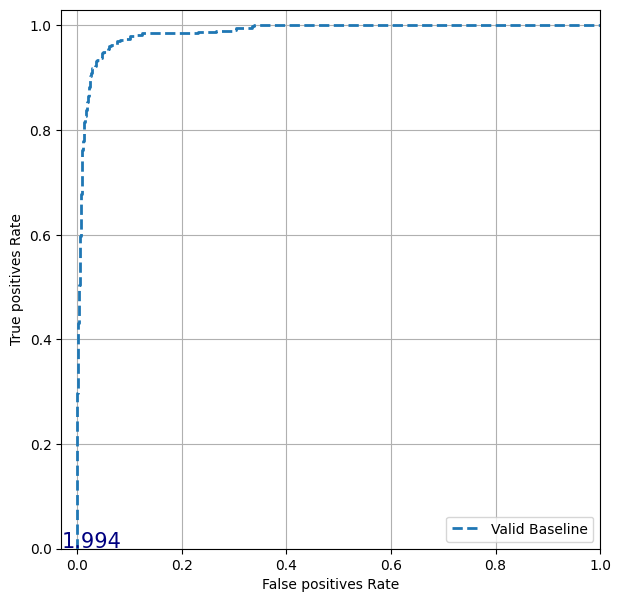

In [ ]:
#decide the cutoff for classifying the predicted probabilities as 1 or 0
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

mpl.rcParams['figure.figsize'] = (7,7)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
cutoff=0.86
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= cutoff),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < cutoff),0,test_data.pred_sentiment)

labels = [0, 1]
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4025
           1       0.92      0.89      0.90       893

    accuracy                           0.97      4918
   macro avg       0.95      0.94      0.94      4918
weighted avg       0.96      0.97      0.97      4918



## TESTING MODEL ON THE TEST DATASET PROVIDED

In [ ]:
# Load the final test data
final_test = pd.read_csv("test.csv")

# Create a copy and preprocess the text data
ftest = final_test.copy()
ftest.drop(columns=['id'], axis=1, inplace=True)

# Apply preprocessing functions to the tweets
ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

# Convert sentences to sequences of numbers and pad them
maxlen = 50
f_test = pad_sequences(tokenizer.texts_to_sequences(ftest['tweet'].tolist()), padding='post', maxlen=maxlen)

# Display the padded sequences
print(x_test)

[[2669 2099    6 ...    0    0    0]
 [   2  110    2 ...    0    0    0]
 [ 566    1    2 ...    0    0    0]
 ...
 [6295   95  137 ...    0    0    0]
 [ 170   93    1 ...    0    0    0]
 [   1    1    1 ...    0    0    0]]


In [ ]:
#predict on actual test data
predictions = model.predict(f_test)

538/538 [==============================] - 7s 13ms/step


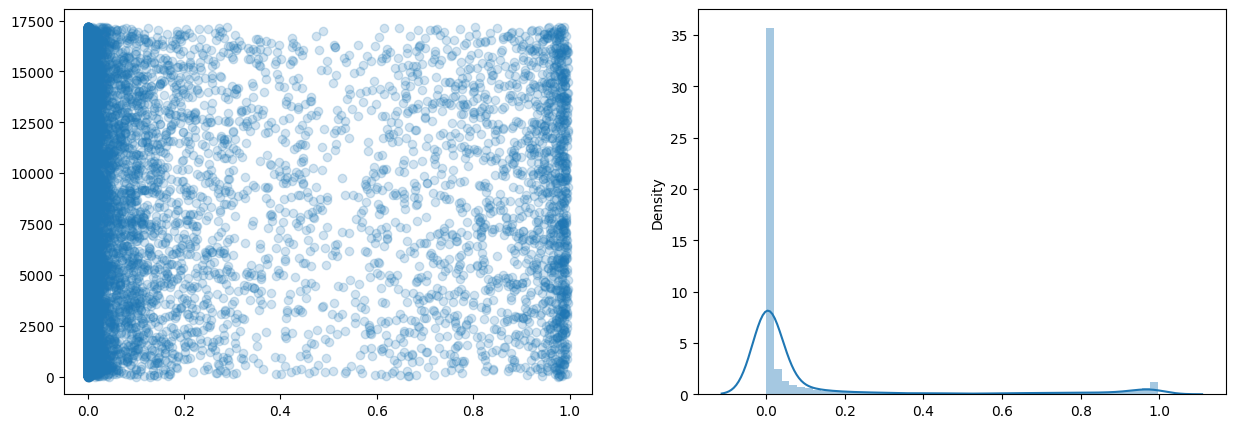

In [ ]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,ftest.index,alpha=0.2)
ax2=sns.distplot(predictions)

In [ ]:
#mapping prediction to 1 or 0
ftest['pred_sentiment']= predictions
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment >= cutoff),1,ftest.pred_sentiment)
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment < cutoff),0,ftest.pred_sentiment)

#processed tweets categorized as hate speech
pd.set_option('display.max_colwidth', None)
ftest[ftest['pred_sentiment']==1]

,tweet,pred_sentiment
1,user white supremacists want everyone birdsâ movie hereâs,1.0
19,thought factory neutrality right wing fascism politics media brexit trump leadership,1.0
26,chick gets fucked hottest naked lady,1.0
33,suppo taiji fisherman bullying racism tweet4taiji thecove seashepherd,1.0
37,user snow white open sleepy sneezy bashful today,1.0
...,...,...
17128,user governmentâs antisemitism definition conflates with valid criticism israel opendemocracy,1.0
17148,grew fucked upð¤ fucked upð¥ believing better place fucking upð© âï¸,1.0
17176,user user most racist ever,1.0
17188,black professor demonizes proposes nazi style confiscation white assets like 1930s germany breaking,1.0


In [ ]:
#actual tweets categorized as hate speech
final_test.iloc[ftest[ftest['pred_sentiment']==1].index]

,id,tweet
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
19,31982,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3
26,31989,chick gets fucked hottest naked lady
33,31996,suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd
37,32000,"@user snow white --&gt; open! --&gt; #sleepy, , #sneezy and #bashful. @ or dm us today! [#]"
...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism definition conflates with valid criticism of #israel | opendemocracy
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm believing you in a better place but it's fucking me upð© Ã¨ âï¸
17176,49139,@user @user are the most racist pay ever!!!!!
17188,49151,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking"
